In [7]:
import face_recognition # import face recognition library
import matplotlib.pyplot as plt # import matplotlib plot
import matplotlib.image as mpimg # import matplotlib image
import matplotlib.patches as patches # import matplotlib patch drawing

11 face(s) detected
[(115, 1192, 177, 1130), (122, 349, 184, 287), (188, 895, 239, 844), (159, 175, 211, 124), (113, 671, 164, 619), (156, 1110, 218, 1047), (124, 1264, 176, 1212), (147, 469, 199, 417), (136, 222, 188, 170), (177, 66, 239, 4), (124, 924, 176, 872)]


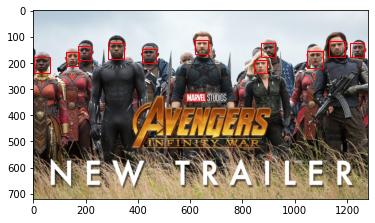

In [10]:
img_path = "./infinitywar_test.jpg" # image path assignment

image = face_recognition.load_image_file(img_path)
face_locations = face_recognition.face_locations(image)
# face_locations = face_recognition.face_locations(image, model="cnn")

print(str(len(face_locations)) + " face(s) detected")
print(face_locations)

figure, ax = plt.subplots()
face_regions = [0]*len(face_locations) # populate array for the rectangles to be drawn around the recognized faces

for i in range(len(face_regions)):
    face_regions[i] = patches.Rectangle((face_locations[i][3],face_locations[i][0]),abs(face_locations[i][2]-face_locations[i][0]),abs(face_locations[i][3]-face_locations[i][1]), edgecolor='r', facecolor="none")

matplotlib_image = mpimg.imread(img_path)
ax.imshow(matplotlib_image)

for i in range(len(face_locations)):
    ax.add_patch(face_regions[i])